![logo](https://xccelerate.co/static/logo@3x-45da759fdee2af1d7e8b7cc2c3e8e73e-2c425.png)

# Pandas Exploratory Data Analysis Techniques

The learning objectives are:
* Methods
* Data cleaning, missing data
* GroupBy
* Plot

Use common techniques for exploratory data analysis (eda).

In [44]:
import pandas as pd
import numpy as np

## Common dataframe operations

In [169]:
df = pd.DataFrame({'A1':['a1', 'a2', 'a3', 'a4', 'a5'],'B1': [1, 3.43, 2, 7.54, 11], 'C1':['a32', 'rty', 'xy54', 'lm54', '4.3adf'], 'D1':[123, 456, 789, -654, -321]})
df

,A1,B1,C1,D1
0,a1,1.00,a32,123
1,a2,3.43,rty,456
2,a3,2.00,xy54,789
3,a4,7.54,lm54,-654
4,a5,11.00,4.3adf,-321


### shape
`.shape` return a tuple of the dataframe dimensionality

In [142]:
df.shape

(5, 4)

### describe
`.describe()` return a stats summary of dataframe

In [143]:
df.describe()

,B1,D1
count,5.000000,5.000000
mean,4.994000,78.600000
std,4.180799,579.968361
min,1.000000,-654.000000
25%,2.000000,-321.000000
50%,3.430000,123.000000
75%,7.540000,456.000000
max,11.000000,789.000000


### set_index
`.set_index()` change the index to an existing column

In [170]:
df = df.set_index(df['A1'])
df

,A1,B1,C1,D1
A1,,,,
a1,a1,1.00,a32,123
a2,a2,3.43,rty,456
a3,a3,2.00,xy54,789
a4,a4,7.54,lm54,-654
a5,a5,11.00,4.3adf,-321


### drop
`.drop()` drop specified labels row or column wise

In [171]:
df = df.drop('A1', axis=1) # axis = 1 is to drop column A1
df

,B1,C1,D1
A1,,,
a1,1.00,a32,123
a2,3.43,rty,456
a3,2.00,xy54,789
a4,7.54,lm54,-654
a5,11.00,4.3adf,-321


### reset_index
`reset_index()` reset the index 

In [172]:
df = df.reset_index()
df

,A1,B1,C1,D1
0,a1,1.00,a32,123
1,a2,3.43,rty,456
2,a3,2.00,xy54,789
3,a4,7.54,lm54,-654
4,a5,11.00,4.3adf,-321


### unique
`.unique()` return an array of unique values in Series object

In [173]:
df['B1'].unique()

array([ 1.  ,  3.43,  2.  ,  7.54, 11.  ])

### nunique
`.nunique()` return number of unique values

In [174]:
df['C1'].nunique()

5

### value counts
`.value_counts()` a Series method that returns an object containing the count of all unique values

In [175]:
df['D1'].value_counts()

-654    1
 789    1
 123    1
-321    1
 456    1
Name: D1, dtype: int64

### sort values
`.sort_values()` sort dataframe along either axis

In [176]:
df.sort_values(by='C1')

,A1,B1,C1,D1
4,a5,11.00,4.3adf,-321
0,a1,1.00,a32,123
3,a4,7.54,lm54,-654
1,a2,3.43,rty,456
2,a3,2.00,xy54,789


### isnull
`.isnull()` detect missing values for an array like object, returns a boolean array, by default detects None or np.nan objects as missing

[official working with missing values pandas doc](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [177]:
df.isnull()

,A1,B1,C1,D1
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


### dropna
`.dropna()` remove missing values

In [178]:
df.dropna()

,A1,B1,C1,D1
0,a1,1.00,a32,123
1,a2,3.43,rty,456
2,a3,2.00,xy54,789
3,a4,7.54,lm54,-654
4,a5,11.00,4.3adf,-321


### example with missing values

In [179]:
df_nan = pd.DataFrame({'A1':[None, 'a2', 'a3', 'a4', 'a5'],'B1': [1, 3.43, np.nan, 7.54, 11], 'C1':['a32', 'rty', 'xy54', np.nan, '4.3adf'], 'D1':[123, 456, 789, -654, -321]})
df_nan

,A1,B1,C1,D1
0,None,1.00,a32,123
1,a2,3.43,rty,456
2,a3,NaN,xy54,789
3,a4,7.54,NaN,-654
4,a5,11.00,4.3adf,-321


In [180]:
df_nan.isnull()

,A1,B1,C1,D1
0,True,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [181]:
# will drop all rows with missing values
df_nan.dropna()

,A1,B1,C1,D1
1,a2,3.43,rty,456
4,a5,11.00,4.3adf,-321


### fill in missing values
`.fillna()` fill in missing value with given object

In [182]:
df_nan.fillna('new value')

,A1,B1,C1,D1
0,new value,1,a32,123
1,a2,3.43,rty,456
2,a3,new value,xy54,789
3,a4,7.54,new value,-654
4,a5,11,4.3adf,-321


In [254]:
df_nan['B1'].fillna(df_nan['B1'].mean())

0     1.0000
1     3.4300
2     5.7425
3     7.5400
4    11.0000
Name: B1, dtype: float64

### groupby
`.groupby()` group series by a object or column, apply a given function to the group to return a groupby result

[official groupby pandas doc](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

In [184]:
df_gp = pd.DataFrame({'id':['aaa', 'bbb', 'aaa', 'ccc', 'aaa'],'A1':['a1', 'a2', 'a3', 'a4', 'a5'],'B1': [1, 3.43, 2, 7.54, 11], 'C1':['a32', 'rty', 'xy54', 'lm54', '4.3adf'], 'D1':[123, 456, 789, -654, -321]})
df_gp

,id,A1,B1,C1,D1
0,aaa,a1,1.00,a32,123
1,bbb,a2,3.43,rty,456
2,aaa,a3,2.00,xy54,789
3,ccc,a4,7.54,lm54,-654
4,aaa,a5,11.00,4.3adf,-321


In [186]:
df_gp.groupby('id').mean()

,B1,D1
id,,
aaa,4.666667,197
bbb,3.430000,456
ccc,7.540000,-654


In [187]:
id_groupby = df_gp.groupby('id')

In [190]:
id_groupby.describe()

B1                                                       D1         \
    count      mean       std   min   25%   50%   75%    max count   mean   
id                                                                          
aaa   3.0  4.666667  5.507571  1.00  1.50  2.00  6.50  11.00   3.0  197.0   
bbb   1.0  3.430000       NaN  3.43  3.43  3.43  3.43   3.43   1.0  456.0   
ccc   1.0  7.540000       NaN  7.54  7.54  7.54  7.54   7.54   1.0 -654.0   

                                                    
            std    min    25%    50%    75%    max  
id                                                  
aaa  558.687748 -321.0  -99.0  123.0  456.0  789.0  
bbb         NaN  456.0  456.0  456.0  456.0  456.0  
ccc         NaN -654.0 -654.0 -654.0 -654.0 -654.0

### Real data example

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
# california housing dataset
ca = pd.read_csv('housing.csv')

In [362]:
ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [363]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [364]:
# stats summary 
ca.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [365]:
# find missing values
ca.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

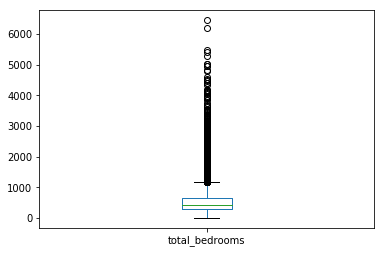

In [366]:
ca['total_bedrooms'].plot('box')

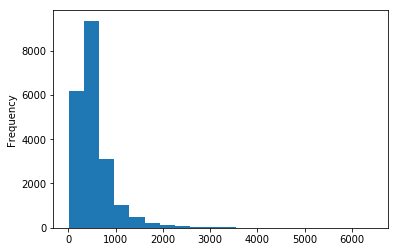

In [415]:
# not evenly distributed
ca['total_bedrooms'].plot('hist',bins=20)

In [368]:
# to replace missing values, use groupby on a categorical and then aggregate column with missing value
ocean_gb = ca.groupby('ocean_proximity')

In [374]:
ca['total_bedrooms'] = ocean_gb['total_bedrooms'].apply(lambda x: x.fillna(x.mean()))

In [375]:
ca.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

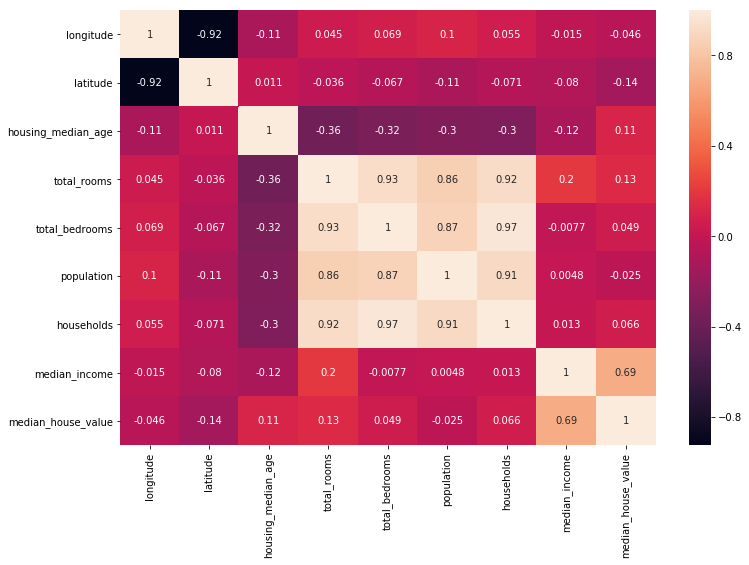

In [380]:
# lets find data correlation
plt.figure(figsize=(12,8))
sns.heatmap(ca.corr(), annot=True)

In [382]:
# further inspect ocean_proximity 
ca['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

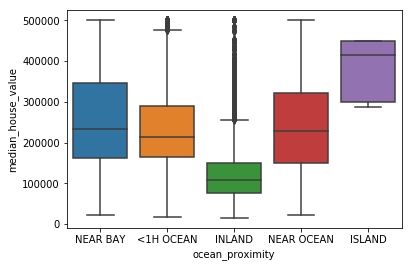

In [381]:
sns.boxplot(ca['ocean_proximity'], ca['median_house_value'])

C:\Users\Hustlin aint ez\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


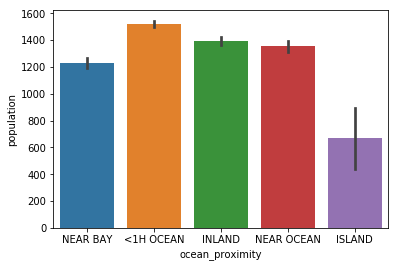

In [418]:
# population and ocean proximity
sns.barplot(ca['ocean_proximity'], ca['population'])

C:\Users\Hustlin aint ez\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


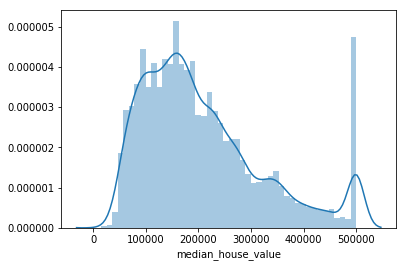

In [383]:
# look at target median_house_value
sns.distplot(ca['median_house_value'])

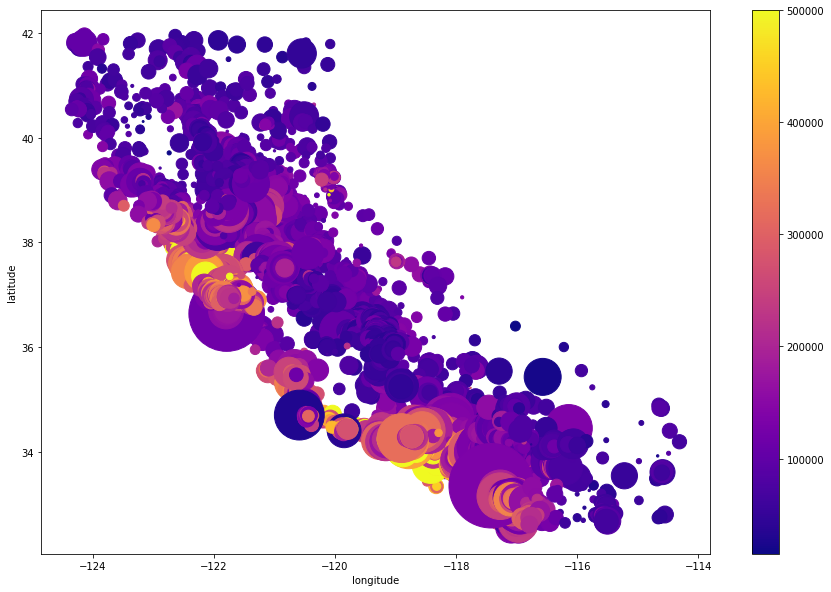

In [424]:
# latitude and longitude, population and median house value
plt.figure(figsize=(15,10))
plt.scatter(ca['longitude'],ca['latitude'],c=ca['median_house_value'],s=ca['population']/5,cmap='plasma')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()